# Data Understanding

Inhaltsverzeichnis

In [2]:
%load_ext autoreload
%autoreload 2

---

## Data Collection

### Hashtagliste

Damit für die spätere Analyse vor allem *relevante* Twitter-Beiträge vorliegen, müssen Beiträge gesammelt werden welche die Branche betreffen. Dazu muss eine auf die Branche abgestimmte Hashtagliste festgelegt werden, welche der Anfrage für die Suche übergeben werden kann. Die Hashtagliste sollte die wichtigsten und meistgenutzten Hashtags der Branche enthalten.

#### 1. Erstellen der Hashtagliste

Um die wichtigsten und meistgenutzten Hashtags der Branche zu erhalten, wird einer Suche eine passende Vorauswahl von Hashtags übergeben. Dann wird nach Twitter-Beiträgen gesucht, welche einen oder mehrere dieser Hashtags enthält. Zumeist enthält ein Twitter-Beitrag dann noch weitere Hashtags, welche die Branche betreffen. Diese werden dann in einer Liste abgespeichert - die Hashtagliste

In [2]:
%%script false
from src.data import hashtags
from src import utils

starting_hashtags = ['#Tech', '#technology', '#TechTrends2023', '#Innovation', '#DisruptiveTech']

# generate a list of similar hashtags
htl = hashtags.search_similar_hashtags(starting_hashtags, since='2023-01-01', until='2023-03-31')

# serialize the list and save it as a pkl file
utils.safe_as_pkl(obj=htl, filename='hashtaglist', path='../data/raw')

Couldn't find program: 'false'


#### 2. Analyse der Hashtagliste

Nachdem die Hashtagliste generiert wurde, werden die Hashtags gezählt und innerhalb eines Dataframes abgespeichert und sortiert. Anschließend werden die meistgenutzten Hastags als Balkendiagramm angezeigt. 

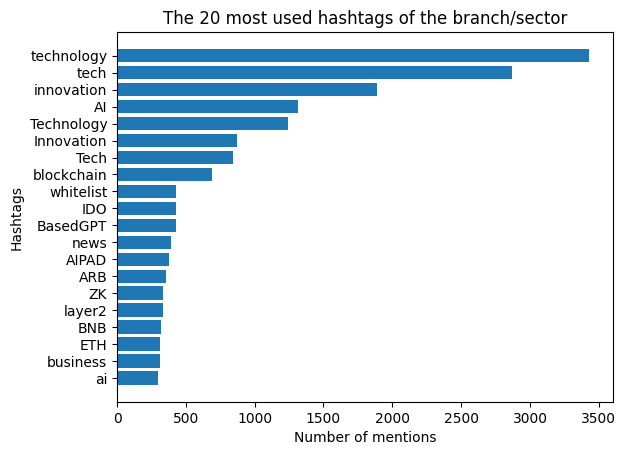

In [3]:
from src import utils
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

number_of_results_to_show = 20

# load
htl = utils.load_pkl(path='../data/raw/hashtaglist.pkl')[0]

# count how often the hashtags appear in the list
hc = Counter(htl)

# save the result of the count as a pandas dataframe
df = pd.DataFrame(dict(hc).items(), columns=['hashtag', 'number'])

# sort df so that a bar chart shows the most common hashtags first
df = df.sort_values(by=['number'], ascending=False)
df = df[:number_of_results_to_show]
df = df.sort_values(by=['number'])

# setup and display bar chart
plt.barh(y=df.hashtag, width=df.number)
plt.title(f'The {str(number_of_results_to_show)} most used hashtags of the branch/sector')
plt.xlabel('Number of mentions')
plt.ylabel('Hashtags')
plt.show()

### Sammeln Twitter Datensatz

Als nächstes muss der Datensatz gesammelt und erstellt werden. Dazu müssen zunächst Twitter-Beiträge gesammelt und als Dataframe gespeichert werden. Mithilfe des Dataframes lassen sich die gesammelten Daten dann anzeigen und untersuchen.

#### 1. Daten sammeln

Um ausschließlich relevante und die Branche betreffende Twitter-Beiträge zu sammeln wird den Suchparametern die zuvor festgelegte Hashtagliste übergeben. Darüber hinaus werden noch weitere Suchparameter hinzugefügt:
- min_faves:1; Die Beiträge sollen mindestens 1 Like bekommen haben
- lang:en; Die Beiträge sollen ausschließlich in englischer Sprache verfasst sein
- until:2023-03-31 since:2023-01-01; Die Beiträgen sollen im Q1 2023 veröffentlicht worden sein

In [4]:
%%script false
from src.data import twitter_scraper

# set search query
query = '(#technology, OR #tech, OR #innovation, OR #AI, OR #blockchain, OR #business) min_faves:1 lang:en until:2023-03-31 since:2023-01-01'

# collect twitter posts
_ = twitter_scraper.get_twitter_posts(query, limit=50)

51it [00:03, 16.76it/s]                                                                                                                                                                                                   


#### 2. Datensatz anzeigen

Nachdem die Twitter-Beiträge gesammelt wurden, werden sie in ein Dataframe transformiert und angezeigt.

In [1]:
from src import utils
import pandas as pd

# load collected posts
list_of_tweets = utils.load_pkl(path='../data/raw/twitter_tweets_raw.pkl')[0]

In [3]:
from IPython.display import display

# set up jupyter to be able to display the entire dataframe (specifically all columns)
pd.options.display.max_columns = None

# transform posts into a dataframe and display them
df = pd.DataFrame(list_of_tweets)
df.head(4)

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,links,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,https://twitter.com/YueDongCS/status/164159107...,2023-03-30 23:59:46+00:00,My condolences and sad that the #NLP and #AI c...,My condolences and sad that the #NLP and #AI c...,1641591075512147968,https://twitter.com/YueDongCS,0,1,4,0,1641591075512147968,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,None,None,https://twitter.com/hmkyale/status/16414545569...,NaN,None,None,None,None,"[NLP, AI]",None,None,923.0,None
1,https://twitter.com/Mlearning_ai/status/164159...,2023-03-30 23:59:43+00:00,Hiring Now: The Top Jobs of the Future Fueled ...,Hiring Now: The Top Jobs of the Future Fueled ...,1641591062757097473,https://twitter.com/Mlearning_ai,0,0,1,0,1641591062757097473,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",https://ifttt.com,IFTTT,"[TextLink(text='ift.tt/MsqNDRJ', url='https://...",None,None,None,NaN,None,None,None,None,"[art, AIart, machinelearning, MLsoGood, artifi...",None,SummaryCard(title='Hiring Now: The Top Jobs of...,83.0,None
2,https://twitter.com/HackerAran7/status/1641591...,2023-03-30 23:59:43+00:00,What’s the hack. #stem #science #stemeducation...,What’s the hack. #stem #science #stemeducation...,1641591062329438209,https://twitter.com/HackerAran7,0,0,3,0,1641591062329438209,en,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,None,[Photo(previewUrl='https://pbs.twimg.com/media...,None,None,NaN,None,None,None,None,"[stem, science, stemeducation, education, engi...",None,None,69.0,None
3,https://twitter.com/Stemble_/status/1641590942...,2023-03-30 23:59:14+00:00,"🚀 Mark your calendars, Apple enthusiasts! 🗓️\n...","🚀 Mark your calendars, Apple enthusiasts! 🗓️\n...",1641590942150049792,https://twitter.com/Stemble_,1,1,2,0,1641590942150049792,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,None,[Photo(previewUrl='https://pbs.twimg.com/media...,None,None,NaN,None,None,None,None,"[Apple, MixedRealityHeadset, AppleEvent, TechN...",None,None,138.0,None


---

## Data Exploration

Nun gilt es den gesammelten Datensatz zu beschreiben, zu untersuchen und abschließend zu bewerten. Die Untersuchung dient dem Zweck die Daten hinsichtlich ihrer Qualität zu bewerten.

#### 1. Überblick

In [4]:
df.dtypes

url                              object
date                datetime64[ns, UTC]
rawContent                       object
renderedContent                  object
id                                int64
user                             object
replyCount                        int64
retweetCount                      int64
likeCount                         int64
quoteCount                        int64
conversationId                    int64
lang                             object
source                           object
sourceUrl                        object
sourceLabel                      object
links                            object
media                            object
retweetedTweet                   object
quotedTweet                      object
inReplyToTweetId                float64
inReplyToUser                    object
mentionedUsers                   object
coordinates                      object
place                            object
hashtags                         object


#### 2. Überprüfe Anforderungen an den Datensatz

Um die Qualität der Daten bewerten zu können, muss zuerst sichergestellt werden, ob die Daten auch den zuvor aufgestellen Anforderungen entsprechen.

In [5]:
# check whether all posts were created within the selected period
# expected result: True

_ = df.copy()
_['date'] = pd.to_datetime(_.date).dt.tz_localize(None)

_.query('date < "2023-01-01" or date > "2023-03-31"').empty

True

In [6]:
# check if entries have no text
# expected result: False

df['rawContent'].isnull().any()

False

In [13]:
# check for duplicates
# expected result: False

df['rawContent'].duplicated().any()

1490


In [7]:
# check if all texts are in English
# expected result: True

df['lang'].eq('en').all()

False

---